## Step1. 讀取資料

In [1]:
import pandas as pd

df = pd.read_csv("HW4_prob2.csv")
pairs = list()

for _, v in df.iterrows():
    x, y = v["U1"], v["U2"]
    pairs.append((x,y))

## Step2. 建構 GAN 網路

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

NUM_SEEDS = 10

class FullyConnect(nn.Module):
    def __init__(self, in_size,
                       out_size,
                       activation=None):
        super().__init__()
        self.act = activation
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        x = self.linear(x)
        if not self.act is None:
            x = self.act(x)
        return x

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        rate = 0.05
        self.body = nn.Sequential(
            FullyConnect(NUM_SEEDS, 32, nn.SiLU()),
            nn.Dropout(rate),
            FullyConnect(32, 32, nn.SiLU()),
            nn.Dropout(rate),
            FullyConnect(32, 2),
        )

    def gen(self, batches):
        noise = torch.normal(0, NUM_SEEDS, size=(batches, NUM_SEEDS))
        return self(noise)

    def forward(self, x):
        x = self.body(x)
        return x

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        rate = 0.05
        self.body = nn.Sequential(
            FullyConnect(2, 32, nn.SiLU()),
            nn.Dropout(rate),
            FullyConnect(32, 32, nn.SiLU()),
            nn.Dropout(rate),
            FullyConnect(32, 1, nn.Sigmoid()),
        )

    def forward(self, x):
        x = self.body(x)
        return x

## Step3. 訓練 GAN

steps: 1000 -> G loss: 0.694155, D loss: 0.694016
steps: 2000 -> G loss: 0.69588, D loss: 0.692666
steps: 3000 -> G loss: 0.71289, D loss: 0.686694
steps: 4000 -> G loss: 0.689422, D loss: 0.69656
steps: 5000 -> G loss: 0.693013, D loss: 0.693383


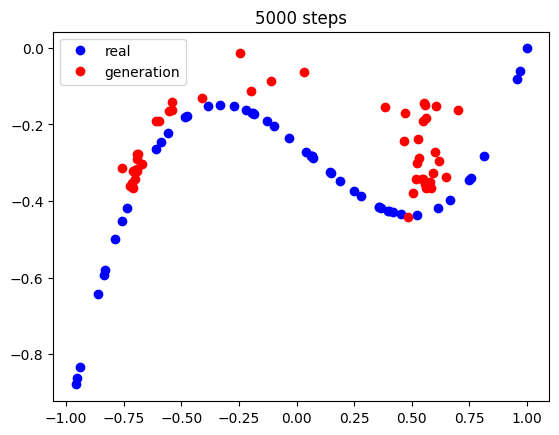

steps: 6000 -> G loss: 0.693553, D loss: 0.693225
steps: 7000 -> G loss: 0.692949, D loss: 0.693519
steps: 8000 -> G loss: 0.693218, D loss: 0.693304
steps: 9000 -> G loss: 0.6932, D loss: 0.693287
steps: 10000 -> G loss: 0.693234, D loss: 0.693251


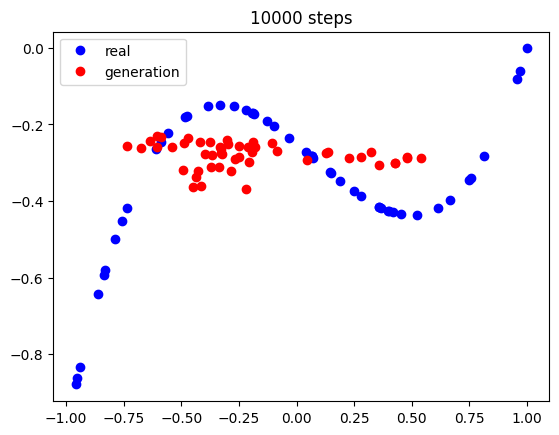

steps: 11000 -> G loss: 0.693105, D loss: 0.693189
steps: 12000 -> G loss: 0.693852, D loss: 0.693336
steps: 13000 -> G loss: 0.693065, D loss: 0.693295
steps: 14000 -> G loss: 0.693165, D loss: 0.693183
steps: 15000 -> G loss: 0.743268, D loss: 0.67461


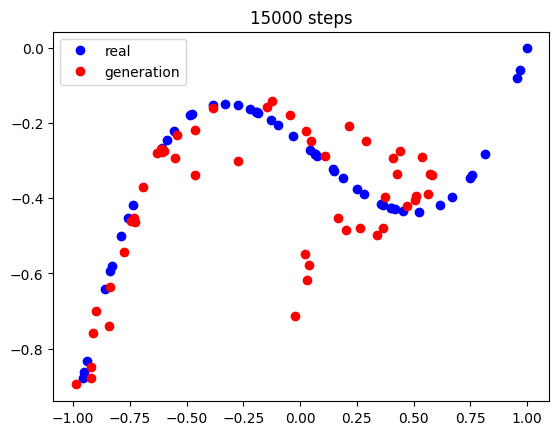

steps: 16000 -> G loss: 0.706581, D loss: 0.687983
steps: 17000 -> G loss: 0.702179, D loss: 0.690046
steps: 18000 -> G loss: 0.703013, D loss: 0.689511
steps: 19000 -> G loss: 0.706281, D loss: 0.687749
steps: 20000 -> G loss: 0.712811, D loss: 0.685915


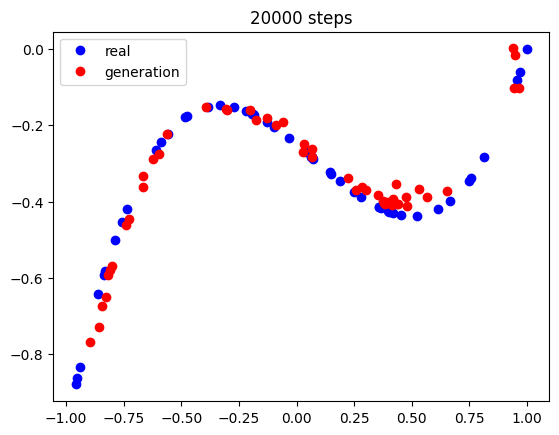

steps: 21000 -> G loss: 0.718751, D loss: 0.684058
steps: 22000 -> G loss: 0.735749, D loss: 0.678552
steps: 23000 -> G loss: 0.749116, D loss: 0.67195
steps: 24000 -> G loss: 0.757172, D loss: 0.667384
steps: 25000 -> G loss: 0.757128, D loss: 0.668322


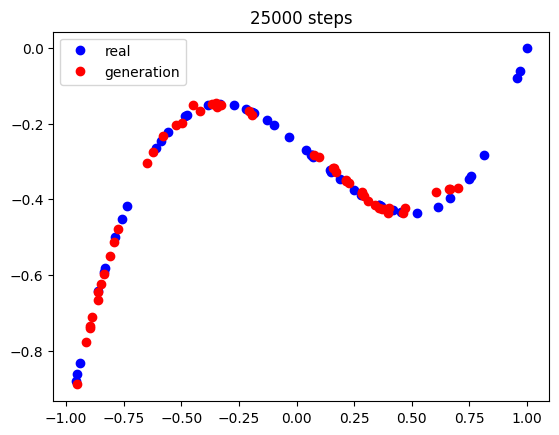

steps: 26000 -> G loss: 0.750406, D loss: 0.671035
steps: 27000 -> G loss: 0.748675, D loss: 0.672228
steps: 28000 -> G loss: 0.751678, D loss: 0.668916
steps: 29000 -> G loss: 0.752785, D loss: 0.66806
steps: 30000 -> G loss: 0.753694, D loss: 0.668813


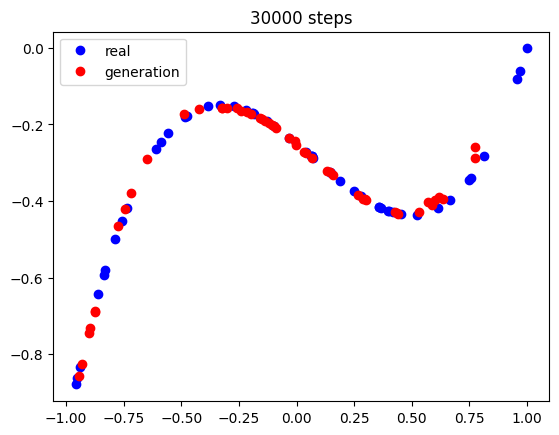

steps: 31000 -> G loss: 0.755397, D loss: 0.667817
steps: 32000 -> G loss: 0.755127, D loss: 0.667594
steps: 33000 -> G loss: 0.760969, D loss: 0.664233
steps: 34000 -> G loss: 0.760313, D loss: 0.66574
steps: 35000 -> G loss: 0.765557, D loss: 0.664342


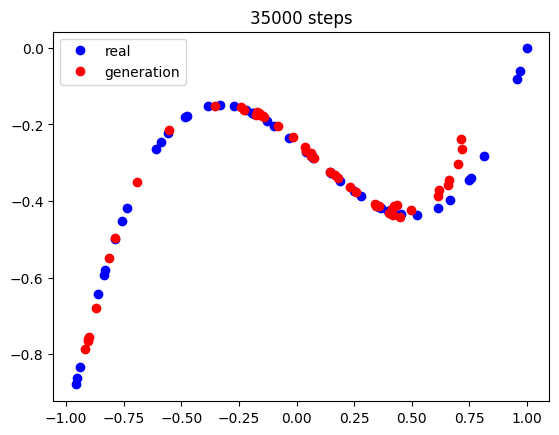

steps: 36000 -> G loss: 0.765033, D loss: 0.66496
steps: 37000 -> G loss: 0.771877, D loss: 0.66247
steps: 38000 -> G loss: 0.767994, D loss: 0.663257
steps: 39000 -> G loss: 0.768409, D loss: 0.662544
steps: 40000 -> G loss: 0.773916, D loss: 0.659901


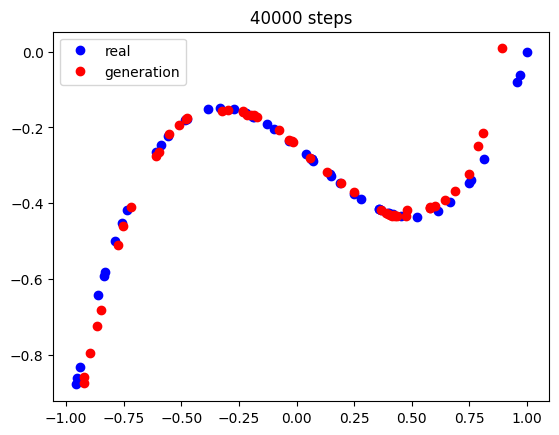

steps: 41000 -> G loss: 0.774926, D loss: 0.659284
steps: 42000 -> G loss: 0.779705, D loss: 0.657945
steps: 43000 -> G loss: 0.782579, D loss: 0.657159
steps: 44000 -> G loss: 0.780472, D loss: 0.657067
steps: 45000 -> G loss: 0.784161, D loss: 0.657145


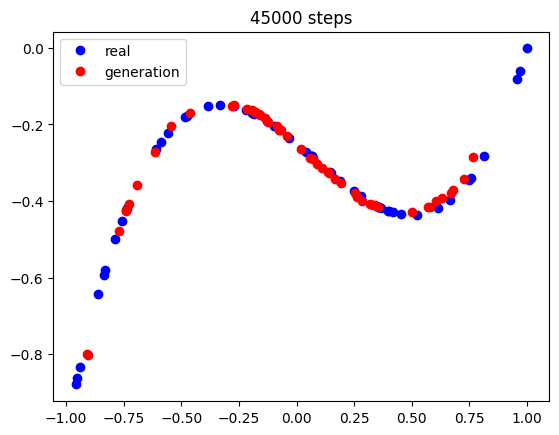

steps: 46000 -> G loss: 0.790371, D loss: 0.6534
steps: 47000 -> G loss: 0.795389, D loss: 0.652786
steps: 48000 -> G loss: 0.793217, D loss: 0.65325
steps: 49000 -> G loss: 0.798518, D loss: 0.651256
steps: 50000 -> G loss: 0.799503, D loss: 0.65138


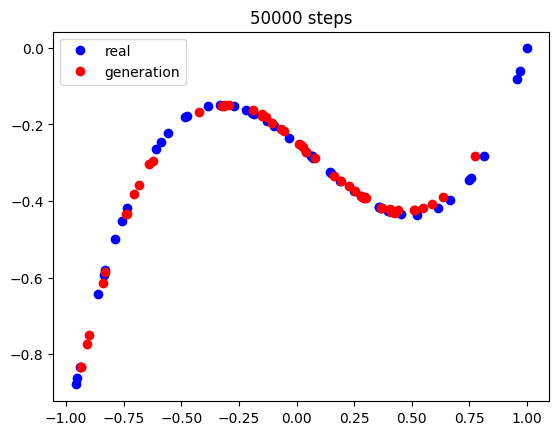

In [3]:
import matplotlib.pyplot as plt

def print_gen_result(net, pairs, title):
    net.eval()
    batch_size = len(pairs)
    gen_data = net.gen(batch_size).detach().numpy()

    rxx, ryy = list(), list()
    for x, y in pairs:
        rxx.append(x)
        ryy.append(y)

    gxx, gyy = list(), list()
    for x, y in gen_data:
        gxx.append(x)
        gyy.append(y)

    plt.title(title)
    plt.plot(rxx, ryy, 'bo', label="real")
    plt.plot(gxx, gyy, 'ro', label="generation")
    plt.legend()
    plt.show()
    net.train()

generator = Generator()
discriminator = Discriminator()
loss_fn = nn.BCELoss()

g_opt = optim.Adam(generator.parameters(),
                   lr=0.002,
                   betas=(0.5, 0.999),
                   weight_decay=0.)
d_opt = optim.Adam(discriminator.parameters(),
                   lr=0.002,
                   betas=(0.5, 0.999),
                   weight_decay=0.)

real_data = torch.from_numpy(np.array(pairs)).float()
max_steps = 50000
batch_size = len(pairs)

g_running_loss = 0
d_running_loss = 0

for s in range(max_steps):
    real_labels = torch.ones(batch_size, 1)
    fake_labels = torch.zeros(batch_size, 1)

    # train Generator
    g_opt.zero_grad()

    gen_data = generator.gen(batch_size)
    g_loss = loss_fn(discriminator(gen_data), real_labels)

    g_loss.backward()
    g_opt.step()

    # train Discriminator
    d_opt.zero_grad()
    real_loss = loss_fn(discriminator(real_data), real_labels)
    fake_loss = loss_fn(discriminator(gen_data.detach()), fake_labels)
    d_loss = (real_loss + fake_loss) / 2

    d_opt.zero_grad()
    d_loss.backward()
    d_opt.step()

    g_running_loss += g_loss.item()
    d_running_loss += d_loss.item()

    if (s+1) % 1000 == 0:
        print("steps: {} -> G loss: {:.6}, D loss: {:.6}".format(s+1, g_running_loss/1000, d_running_loss/1000))
        g_running_loss = 0
        d_running_loss = 0

    if (s+1) % 5000 == 0:
        print_gen_result(generator, pairs, "{} steps".format(s+1))

    if (s+1) % 25000 == 0:
        for opt in [g_opt, d_opt]:
            for param in opt.param_groups:
                param["lr"] = param["lr"] * 0.5